In [43]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Import data with the regions with already known oncogenes, get rid of unnecessary columns

In [31]:
all_data = pd.read_csv("Selection_of_regions_for_ML_with_known_oncogenes.csv")

In [32]:
data = all_data.iloc[:, 3:]

Overall look of the table

In [33]:
data

,rank_expr_norm,rank_pubmed_mean_norm,rank_tf_norm,rank_kinase_norm,rank_crisp_mean_norm,rank_crisp_min_norm,rank_expr_fold_change_norm,rank_is_TSG_norm,rank_GO_term_norm,rank_PPI_norm,SUM_RANK,is_oncogene
0,0.50,0.60,0.60,0.60,0.40,0.40,0.50,0.60,0.60,0.60,5.40,0
1,0.50,0.20,0.60,0.60,1.00,1.00,0.80,0.60,0.20,0.60,6.10,0
2,1.00,0.80,0.60,0.60,0.60,0.80,1.00,0.60,1.00,0.60,7.60,0
3,0.50,1.00,0.60,0.60,0.20,0.20,0.50,0.60,0.40,0.60,5.20,0
4,0.50,0.40,0.60,0.60,0.80,0.60,0.20,0.60,0.80,0.60,5.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2291,0.19,0.38,0.53,0.53,0.12,0.12,0.12,0.53,0.47,0.53,3.52,0
2292,0.69,0.66,0.53,0.53,0.81,0.94,0.62,0.53,0.75,0.53,6.59,0
2293,0.94,0.88,0.53,0.53,1.00,0.75,0.25,0.53,0.84,0.53,6.78,0
2294,0.56,1.00,0.53,0.53,0.75,0.44,0.31,0.53,0.84,0.53,6.02,0


Target

In [34]:
data[["is_oncogene"]]

,is_oncogene
0,0
1,0
2,0
3,0
4,1
...,...
2291,0
2292,0
2293,0
2294,0


In [35]:
data.describe()

,rank_expr_norm,rank_pubmed_mean_norm,rank_tf_norm,rank_kinase_norm,rank_crisp_mean_norm,rank_crisp_min_norm,rank_expr_fold_change_norm,rank_is_TSG_norm,rank_GO_term_norm,rank_PPI_norm,SUM_RANK,is_oncogene
count,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000
mean,0.547683,0.547687,0.548075,0.547770,0.547692,0.547696,0.547679,0.547748,0.547461,0.547443,5.476934,0.095383
std,0.290272,0.288908,0.134958,0.109563,0.290873,0.290901,0.290597,0.053923,0.284482,0.097097,1.217798,0.293808
min,0.020000,0.020000,0.120000,0.440000,0.010000,0.010000,0.010000,0.510000,0.040000,0.320000,2.320000,0.000000
25%,0.300000,0.290000,0.490000,0.500000,0.300000,0.300000,0.300000,0.520000,0.280000,0.510000,4.620000,0.000000
50%,0.550000,0.540000,0.500000,0.520000,0.550000,0.550000,0.545000,0.530000,0.530000,0.530000,5.460000,0.000000
75%,0.800000,0.800000,0.550000,0.550000,0.800000,0.800000,0.800000,0.560000,0.800000,0.560000,6.290000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [36]:
data.shape

(2296, 12)

Split data into train and test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data["is_oncogene"], test_size=0.20, random_state=42, stratify=data["is_oncogene"])

In [38]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [39]:
clf.n_features_in_

11

In [40]:
y_pred = clf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (how many objects got correct labels) is \n{accuracy}")
print()
precision = precision_score(y_test, y_pred)
print(f"Precision (how many oncogenes are actuall oncognes within predicted ones) is \n{precision}")
print()
recall = recall_score(y_test, y_pred)
print(f"Recall (how many oncogenes out of all oncogenes we got right) is \n{recall}")
print()
f1 = f1_score(y_test, y_pred)
print(f"F1 score is \n{f1}")
print()
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f"ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is \n{roc_auc}")

Accuracy (how many objects got correct labels) is 
0.95

Precision (how many oncogenes are actuall oncognes within predicted ones) is 
0.8888888888888888

Recall (how many oncogenes out of all oncogenes we got right) is 
0.5454545454545454

F1 score is 
0.676056338028169

ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is 
0.9260270979020979


Try to test multiple max_depth and n_estimators parameters in cross validation.

In [45]:
max_depth_values = [3, 5, 7, 10, None]
n_estimators_values = [50, 100, 150]
cv_scores = {}
scoring_metric = 'recall'

# Loop through each max_depth and n_estimators values
for max_depth in max_depth_values:
    for n_estim in n_estimators_values:
        # Create a random forest classifier with the current max_depth value
        clf_cv = RandomForestClassifier(n_estimators=n_estim, max_depth=max_depth, random_state=42)
    
        # Perform 5-fold cross-validation and compute the mean score
        scores = cross_val_score(clf_cv, X_train, y_train, cv=5, scoring=scoring_metric)
        cv_scores[(max_depth, n_estim)] = np.mean(scores)

# Print the mean cross-validation scores for each max_depth and n_estim
for (max_depth, n_estim), score in cv_scores.items():
    print(f"Max Depth: {max_depth}, N trees: {n_estim}, Mean CV Score: {score:.4f}")

Max Depth: 3, N trees: 50, Mean CV Score: 0.4057
Max Depth: 3, N trees: 100, Mean CV Score: 0.4114
Max Depth: 3, N trees: 150, Mean CV Score: 0.4229
Max Depth: 5, N trees: 50, Mean CV Score: 0.4857
Max Depth: 5, N trees: 100, Mean CV Score: 0.5029
Max Depth: 5, N trees: 150, Mean CV Score: 0.5086
Max Depth: 7, N trees: 50, Mean CV Score: 0.5143
Max Depth: 7, N trees: 100, Mean CV Score: 0.5314
Max Depth: 7, N trees: 150, Mean CV Score: 0.5429
Max Depth: 10, N trees: 50, Mean CV Score: 0.5314
Max Depth: 10, N trees: 100, Mean CV Score: 0.5486
Max Depth: 10, N trees: 150, Mean CV Score: 0.5429
Max Depth: None, N trees: 50, Mean CV Score: 0.5371
Max Depth: None, N trees: 100, Mean CV Score: 0.5429
Max Depth: None, N trees: 150, Mean CV Score: 0.5314


Base model with 100 estimators gave on of the best results, let leave it.

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

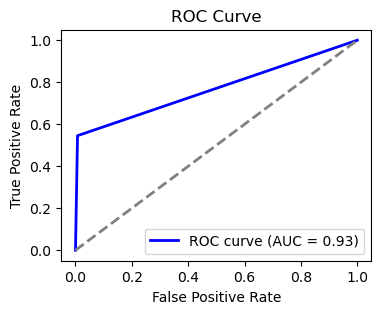

In [49]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Get weights for the features

In [50]:
feature_importances = pd.DataFrame({'feature_name': clf.feature_names_in_, 'importance': clf.feature_importances_})

In [51]:
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,rank_pubmed_mean_norm,0.368944
10,SUM_RANK,0.265934
3,rank_kinase_norm,0.135782
5,rank_crisp_min_norm,0.059903
9,rank_PPI_norm,0.049144
7,rank_is_TSG_norm,0.036179
2,rank_tf_norm,0.033674
8,rank_GO_term_norm,0.028807
4,rank_crisp_mean_norm,0.011587
6,rank_expr_fold_change_norm,0.005751


Visualize one of the trees

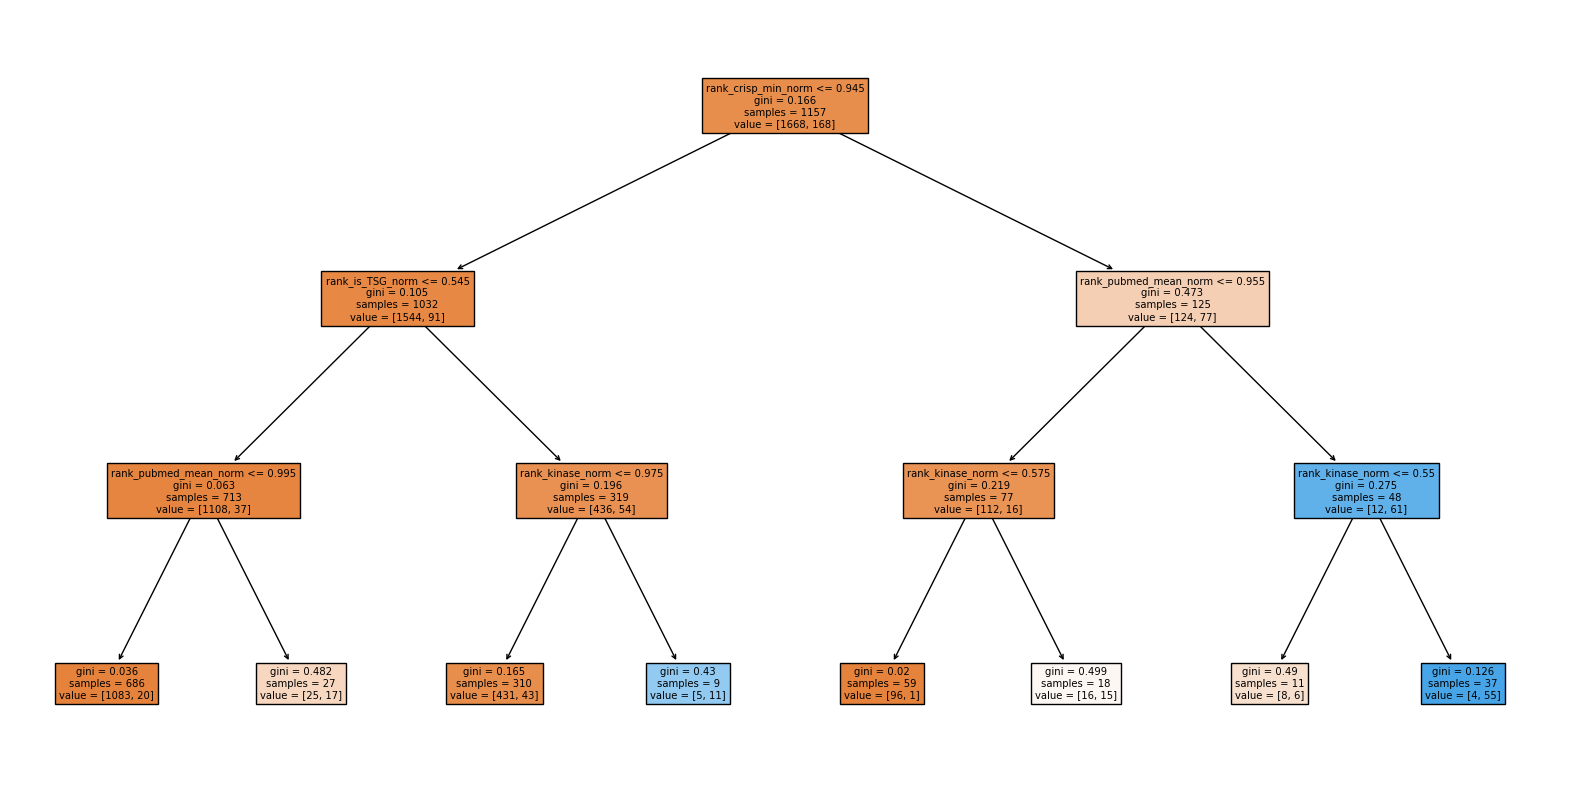

In [52]:
plt.figure(figsize=(20, 10))
_ = tree.plot_tree(clf.estimators_[0], feature_names=list(X_train.columns), filled=True)
plt.show()

Now we take regions without known oncogenes and try to predict which genes are oncogenes in these regions: 
- ONE BY ONE, 
- USE PREDICT PROBA to get probabilities and not class labels
- SELECT ONLY ONE TOP PROBABILITY ONCOGENE PER REGION
- all TSG were removed

In [53]:
new_data = pd.read_csv("Selection_of_regions_for_ML_without_known_oncogenes.csv")

In [54]:
new_data.shape

(19103, 15)

In [58]:
data_to_predict = new_data.iloc[:, 3:]

In [59]:
data_to_predict.head()

,rank_expr_norm,rank_pubmed_mean_norm,rank_tf_norm,rank_kinase_norm,rank_crisp_mean_norm,rank_crisp_min_norm,rank_expr_fold_change_norm,rank_is_TSG_norm,rank_GO_term_norm,rank_PPI_norm,SUM_RANK,group_num
0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,10.00,1
1,0.33,1.00,0.58,0.5,0.50,0.67,0.33,0.58,1.00,0.58,6.07,2
2,0.83,0.83,0.58,0.5,1.00,1.00,1.00,0.58,0.83,0.58,7.73,2
3,0.67,0.33,0.58,0.5,0.33,0.33,0.50,0.58,0.25,0.58,4.65,2
4,0.50,0.50,0.58,1.0,0.67,0.50,0.67,0.58,0.67,0.58,6.25,2


In [60]:
all_predictions = []
max_group = data_to_predict['group_num'].max() + 1

for i in range(1, max_group):
    cur_data = data_to_predict[data_to_predict["group_num"] == i]
    cur_data = cur_data.drop(columns=["group_num"])
    all_predictions.append(clf.predict_proba(cur_data))

In [62]:
len(all_predictions)

3346

In [63]:
all_predictions[0]

array([[0.10823629, 0.89176371]])

In [66]:
import warnings


warnings.filterwarnings('ignore')

final_df =  data_to_predict[data_to_predict["group_num"] == 1]
final_df["prob_of_onco"] = all_predictions[0].T[1]

for i in range(2, 3347):
    cur_df = data_to_predict[data_to_predict["group_num"] == i]
    onco_col = all_predictions[i-1].T[1]
    cur_df["prob_of_onco"] = onco_col
    final_df = pd.concat([final_df, cur_df])

    
final_df

,rank_expr_norm,rank_pubmed_mean_norm,rank_tf_norm,rank_kinase_norm,rank_crisp_mean_norm,rank_crisp_min_norm,rank_expr_fold_change_norm,rank_is_TSG_norm,rank_GO_term_norm,rank_PPI_norm,SUM_RANK,group_num,prob_of_onco
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,1,0.891764
1,0.33,1.00,0.58,0.50,0.50,0.67,0.33,0.58,1.00,0.58,6.07,2,0.331803
2,0.83,0.83,0.58,0.50,1.00,1.00,1.00,0.58,0.83,0.58,7.73,2,0.227361
3,0.67,0.33,0.58,0.50,0.33,0.33,0.50,0.58,0.25,0.58,4.65,2,0.035067
4,0.50,0.50,0.58,1.00,0.67,0.50,0.67,0.58,0.67,0.58,6.25,2,0.126985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,0.08,0.42,0.50,0.54,0.75,0.58,0.75,0.54,0.25,0.54,4.95,3344,0.030508
19099,0.25,0.67,0.50,0.54,0.67,0.92,0.08,0.54,0.50,0.54,5.21,3344,0.049648
19100,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,3345,0.891764
19101,0.50,0.50,0.75,0.50,1.00,1.00,0.50,0.75,0.50,0.75,6.75,3346,0.126243


In [67]:
final_df["prob_of_onco"] = final_df["prob_of_onco"].round(4)

In [68]:
final_df.shape

(19103, 13)

In [69]:
result_df = new_data.join(pd.DataFrame(final_df.iloc[:, -1]))
result_df.shape

(19103, 16)

In [70]:
result_df

,Unnamed: 0,ID,gene_name,rank_expr_norm,rank_pubmed_mean_norm,rank_tf_norm,rank_kinase_norm,rank_crisp_mean_norm,rank_crisp_min_norm,rank_expr_fold_change_norm,rank_is_TSG_norm,rank_GO_term_norm,rank_PPI_norm,SUM_RANK,group_num,prob_of_onco
0,1,TCGA-02-2485_7_52654649_53869348,POM121L12,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,1,0.8918
1,2,TCGA-02-2485_7_56084143_56403069,PSPH,0.33,1.00,0.58,0.50,0.50,0.67,0.33,0.58,1.00,0.58,6.07,2,0.3318
2,3,TCGA-02-2485_7_56084143_56403069,CCT6A,0.83,0.83,0.58,0.50,1.00,1.00,1.00,0.58,0.83,0.58,7.73,2,0.2274
3,4,TCGA-02-2485_7_56084143_56403069,SUMF2,0.67,0.33,0.58,0.50,0.33,0.33,0.50,0.58,0.25,0.58,4.65,2,0.0351
4,5,TCGA-02-2485_7_56084143_56403069,PHKG1,0.50,0.50,0.58,1.00,0.67,0.50,0.67,0.58,0.67,0.58,6.25,2,0.1270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19098,19099,TCGA-ZG-A9M4_17_80369439_81049726,B3GNTL1,0.08,0.42,0.50,0.54,0.75,0.58,0.75,0.54,0.25,0.54,4.95,3344,0.0305
19099,19100,TCGA-ZG-A9M4_17_80369439_81049726,METRNL,0.25,0.67,0.50,0.54,0.67,0.92,0.08,0.54,0.50,0.54,5.21,3344,0.0496
19100,19101,TCGA-ZJ-AAXN_11_101110923_101584390,TRPC6,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10.00,3345,0.8918
19101,19102,TCGA-ZQ-A9CR_8_126360056_126797467,NSMCE2,0.50,0.50,0.75,0.50,1.00,1.00,0.50,0.75,0.50,0.75,6.75,3346,0.1262


Save df

In [71]:
result_df.to_csv('Predictions_by_RandomForestClassifier.csv', index=False)

Save model

In [72]:
import pickle

# Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(clf, f)